In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [2]:
data_path = os.path.join(rpath,'data','data_aggregated.csv')
data = pd.read_csv(data_path)
data

,CustomerId,FirstTransactionDate,LastTransactionDate,FirstDay,FirstMonth,FirstYear,LastDay,LastMonth,LastYear,TotalTransactionAmount,...,TransactionCount,TransactionAmountStdDev,MinTransactionAmount,MaxTransactionAmount,Recency,Frequency,Monetary,Stability,bin,Label
0,CustomerId_1,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00,21,11,2018,21,11,2018,-10000.0,...,1,NaN,-10000.0,-10000.0,83,1,-10000.0,0.000000,"(81.0, 90.0]",1
1,CustomerId_10,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00,21,11,2018,21,11,2018,-10000.0,...,1,NaN,-10000.0,-10000.0,83,1,-10000.0,0.000000,"(81.0, 90.0]",1
2,CustomerId_1001,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00,16,11,2018,16,11,2018,20000.0,...,5,6558.963333,-5000.0,10000.0,89,5,20000.0,6558.963333,"(81.0, 90.0]",1
3,CustomerId_1002,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00,15,11,2018,18,1,2019,4225.0,...,11,560.498966,-75.0,1500.0,25,11,4225.0,560.498966,"(18.0, 27.0]",0
4,CustomerId_1003,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00,1,2,2019,1,2,2019,20000.0,...,6,6030.478146,-5000.0,10000.0,11,6,20000.0,6030.478146,"(9.0, 18.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,2019-02-08 10:23:23+00:00,2019-02-08 10:27:42+00:00,8,2,2019,8,2,2019,20000.0,...,6,6088.240030,-5000.0,10000.0,4,6,20000.0,6088.240030,"(-0.09, 9.0]",0
3738,CustomerId_993,2019-01-18 15:51:50+00:00,2019-01-18 15:56:30+00:00,18,1,2019,18,1,2019,20000.0,...,5,6745.368782,-5000.0,10000.0,25,5,20000.0,6745.368782,"(18.0, 27.0]",0
3739,CustomerId_994,2018-11-15 18:37:07+00:00,2019-02-12 11:17:08+00:00,15,11,2018,12,2,2019,543873.0,...,101,14800.656784,-5000.0,90000.0,0,101,543873.0,14800.656784,"(-0.09, 9.0]",0
3740,CustomerId_996,2018-12-07 14:37:54+00:00,2018-12-07 15:24:31+00:00,7,12,2018,7,12,2018,139000.0,...,17,4433.329648,-5000.0,10000.0,67,17,139000.0,4433.329648,"(63.0, 72.0]",1


In [9]:
data.columns

Index(['CustomerId', 'FirstTransactionDate', 'LastTransactionDate', 'FirstDay',
       'FirstMonth', 'FirstYear', 'LastDay', 'LastMonth', 'LastYear',
       'TotalTransactionAmount', 'AverageTransactionAmount',
       'TransactionCount', 'TransactionAmountStdDev', 'MinTransactionAmount',
       'MaxTransactionAmount', 'Recency', 'Frequency', 'Monetary', 'Stability',
       'bin', 'Label'],
      dtype='object')

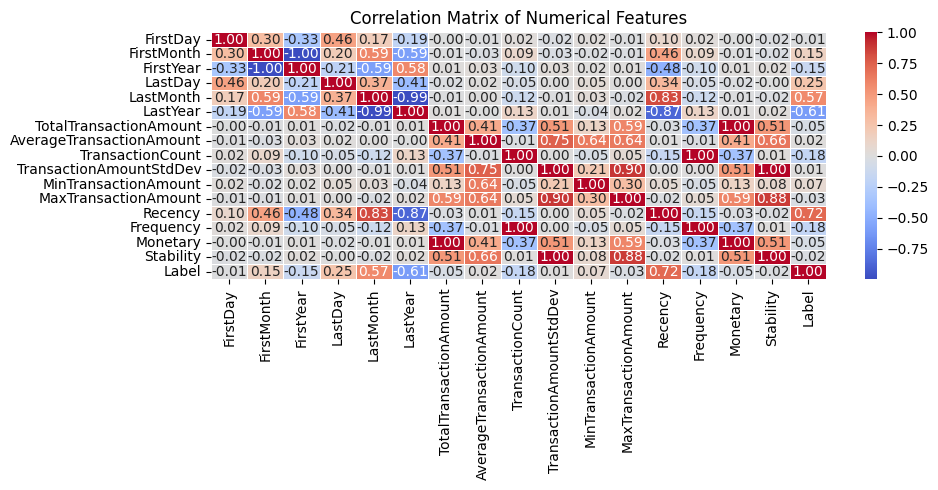

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute and visualize the correlation matrix
def plot_correlation_matrix(df):
    # Select only numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Compute the correlation matrix
    corr_matrix = df[numerical_columns].corr(method='pearson')  # Using Pearson by default

    # Display the correlation matrix as a heatmap
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
    ax.set_title("Correlation Matrix of Numerical Features")

    plt.tight_layout()
    #st.pyplot(fig)

# Call the function to display the correlation matrix
plot_correlation_matrix(data)


In [18]:
data.isnull().sum()

CustomerId                    0
FirstTransactionDate          0
LastTransactionDate           0
FirstDay                      0
FirstMonth                    0
FirstYear                     0
LastDay                       0
LastMonth                     0
LastYear                      0
TotalTransactionAmount        0
AverageTransactionAmount      0
TransactionCount              0
TransactionAmountStdDev     712
MinTransactionAmount          0
MaxTransactionAmount          0
Recency                       0
Frequency                     0
Monetary                      0
Stability                     0
bin                           0
Label                         0
dtype: int64

In [4]:
data['TransactionAmountStdDev'] = data['TransactionAmountStdDev'].fillna(method='ffill').fillna(method='bfill')

C:\Users\AII\AppData\Local\Temp\ipykernel_29124\3409925125.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['TransactionAmountStdDev'] = data['TransactionAmountStdDev'].fillna(method='ffill').fillna(method='bfill')


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score


# Extract relevant features (adjust based on your columns)
X = data[['FirstDay','FirstMonth', 'FirstYear', 'LastDay', 'LastMonth', 'LastYear',
       'TotalTransactionAmount', 'AverageTransactionAmount','TransactionCount', 'TransactionAmountStdDev', 'MinTransactionAmount',
       'MaxTransactionAmount', 'Recency', 'Frequency', 'Monetary', 'Stability',]]
y = data['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Preprocessing pipeline
# # Numerical features
# num_features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
#                 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
#                 'Promo2SinceWeek', 'Promo2SinceYear', 'year', 'month', 'day']
# num_transformer = StandardScaler()

# # Categorical features
# cat_features = ['StateHoliday', 'StoreType', 'Assortment']
# cat_transformer = OrdinalEncoder()  # Use OrdinalEncoder for categorical features

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Make predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9987
F1 Score: 0.9988
Precision: 1.0000
Recall: 0.9977


In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=50, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters: ", random_search.best_params_)

# Get the best estimator
best_rf = random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 1.0000
Confusion Matrix:
 [[314   0]
 [  0 435]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       435

    accuracy                           1.00       749
   macro avg       1.00      1.00      1.00       749
weighted avg       1.00      1.00      1.00       749



In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Make predictions
# y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000


In [10]:
import pickle
from datetime import datetime

# Assuming 'model' is your trained LSTM model

# Get the current timestamp
timestamp = datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')

# Format the filename
filename = f'../models/RF-{timestamp}.pkl'

# Save the model with pickle
with open(filename, 'wb') as file:
    pickle.dump(best_rf, file)

print(f'Model saved as {filename}')

Model saved as ../models/RF-06-10-2024-18-56-51-416515.pkl


In [25]:
import shap

# Initialize the SHAP explainer using the trained Random Forest model
explainer = shap.TreeExplainer(best_rf)  # Use the tuned model

# Compute SHAP values for the entire dataset or a subset
shap_values = explainer.shap_values(X_test)


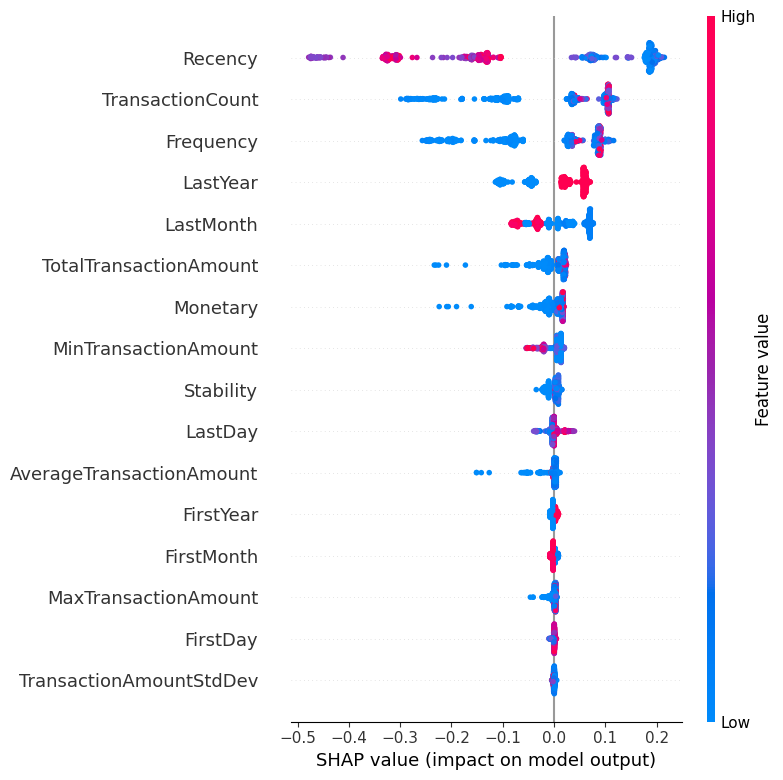

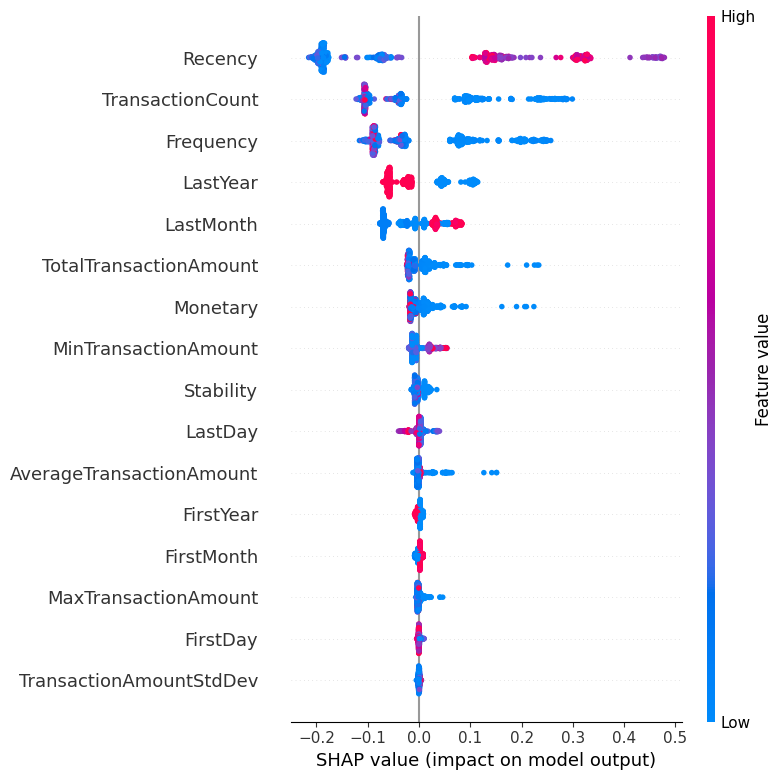

In [26]:
# Extract SHAP values for each class
shap_values_class_0 = shap_values[:, :, 0]  # Shape (749, 10)
shap_values_class_1 = shap_values[:, :, 1]  # Shape (749, 10)

# Plot summary for class 0
shap.summary_plot(shap_values_class_0, X_test, feature_names=X_test.columns)

# Plot summary for class 1
shap.summary_plot(shap_values_class_1, X_test, feature_names=X_test.columns)



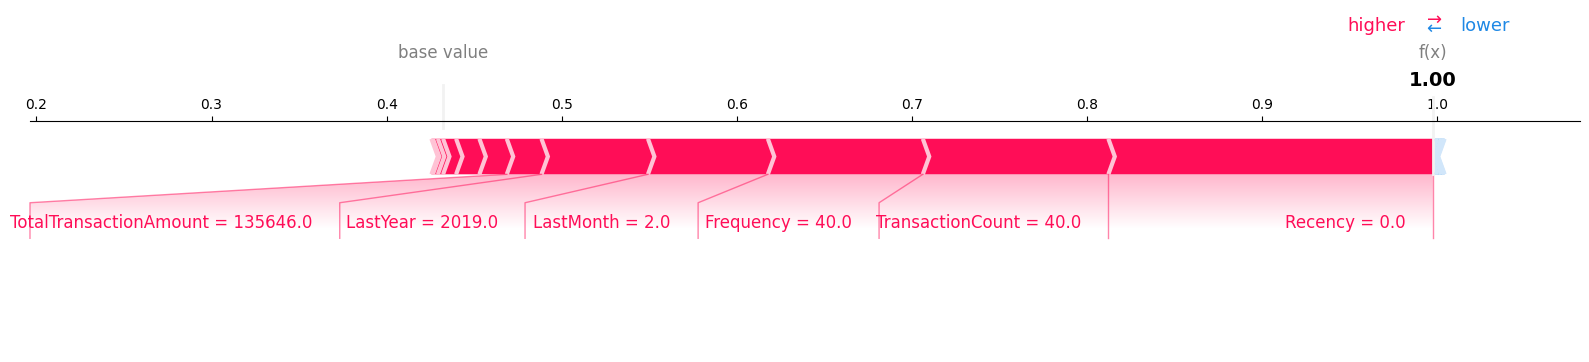

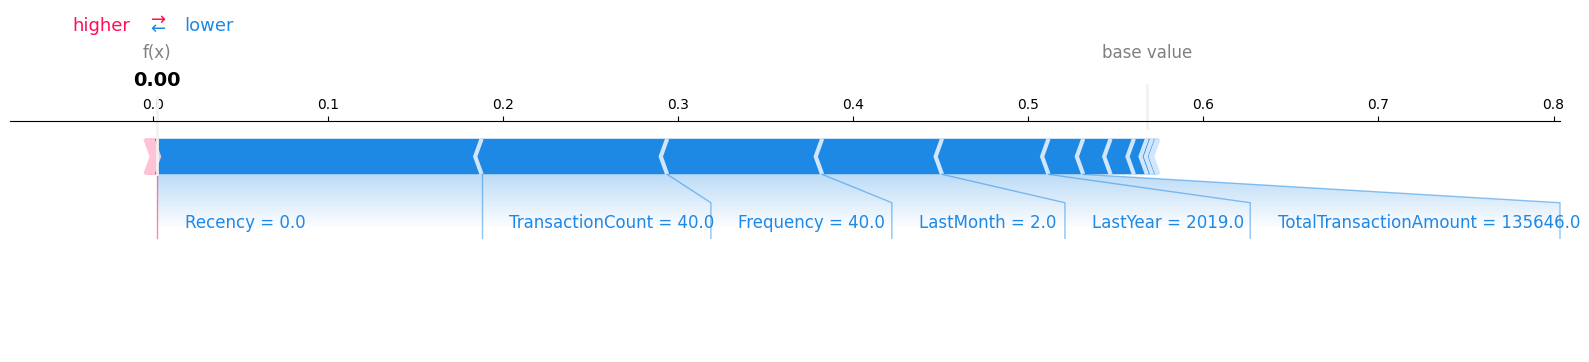

In [27]:
# Choose an instance index (e.g., 0 for the first instance)
instance_index = 0

# Extract SHAP values and features for the specific instance and class
shap_values_instance_class_0 = shap_values[instance_index, :, 0]  # SHAP values for class 0
features_instance = X_test.iloc[instance_index]  # Features for that instance

# Create the force plot for class 0
shap.force_plot(explainer.expected_value[0], shap_values_instance_class_0, features_instance, matplotlib=True)

# If you want to plot for class 1, do the same
shap_values_instance_class_1 = shap_values[instance_index, :, 1]  # SHAP values for class 1
shap.force_plot(explainer.expected_value[1], shap_values_instance_class_1, features_instance, matplotlib=True)


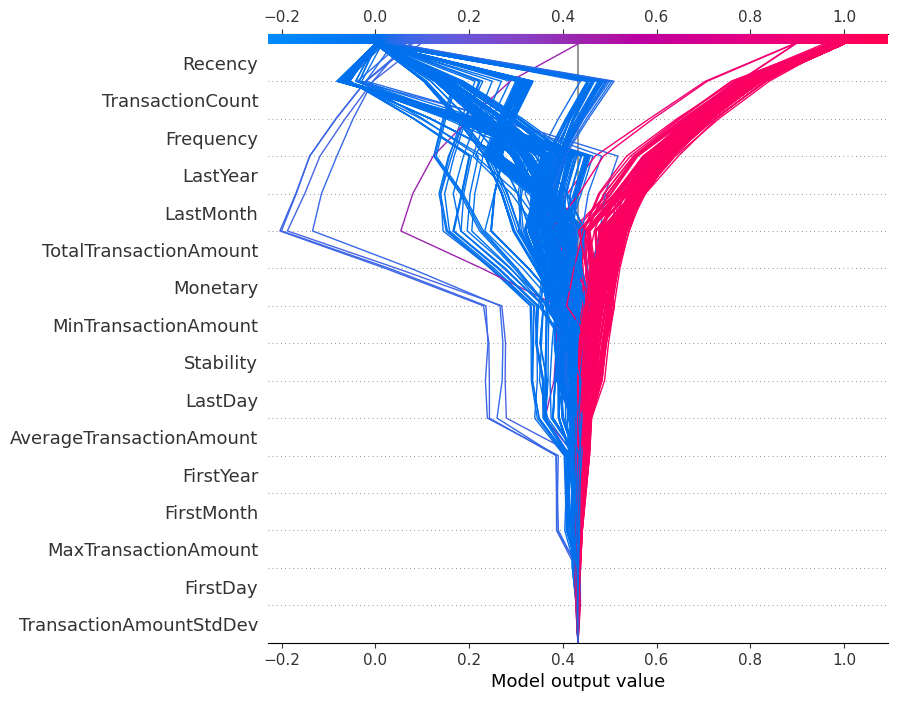

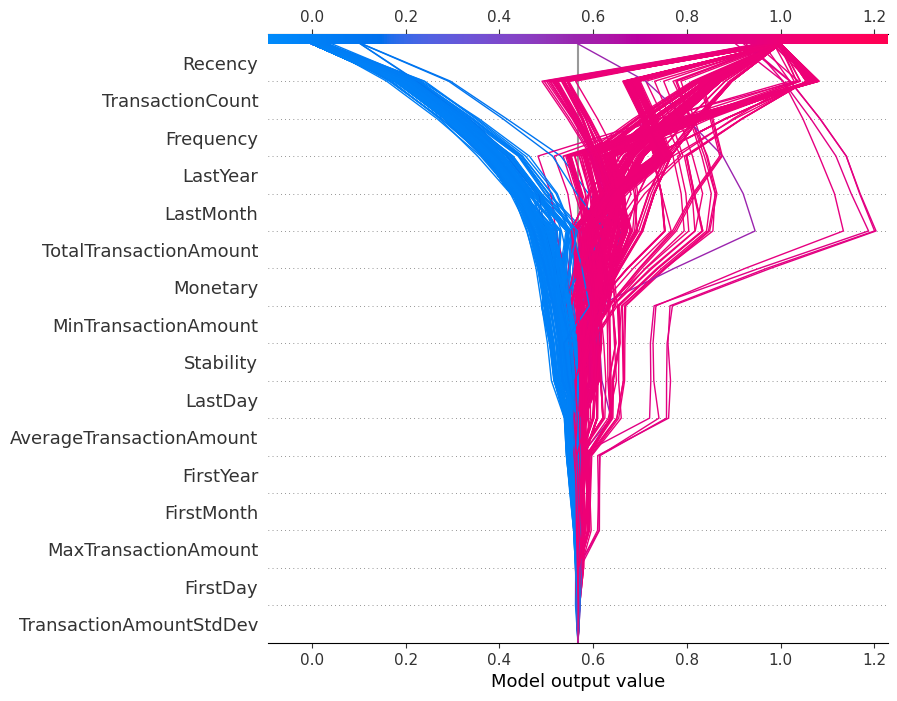

In [28]:
shap.decision_plot(explainer.expected_value[0], shap_values_class_0, X_test.columns)
shap.decision_plot(explainer.expected_value[1], shap_values_class_1, X_test.columns)

**GBM**

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)


GradientBoostingClassifier()

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Make predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 1.0000
Confusion Matrix:
 [[314   0]
 [  0 435]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       435

    accuracy                           1.00       749
   macro avg       1.00      1.00      1.00       749
weighted avg       1.00      1.00      1.00       749



In [32]:
import pickle
from datetime import datetime

# Assuming 'model' is your trained LSTM model

# Get the current timestamp
timestamp = datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')

# Format the filename
filename = f'../models/GBM-{timestamp}.pkl'

# Save the model with pickle
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f'Model saved as {filename}')

Model saved as ../models/GBM-08-10-2024-19-37-26-522202.pkl


In [33]:
import shap

# Initialize the SHAP explainer using the trained Random Forest model
explainer = shap.TreeExplainer(model)  # Use the tuned model

# Compute SHAP values for the entire dataset or a subset
shap_values = explainer.shap_values(X_test)


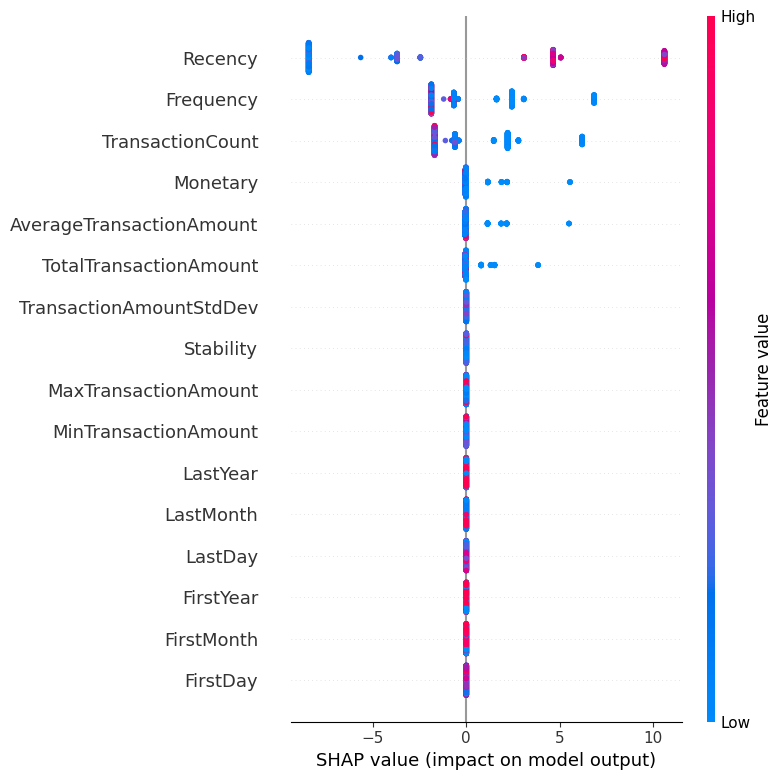

In [37]:
# Plot summary 
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

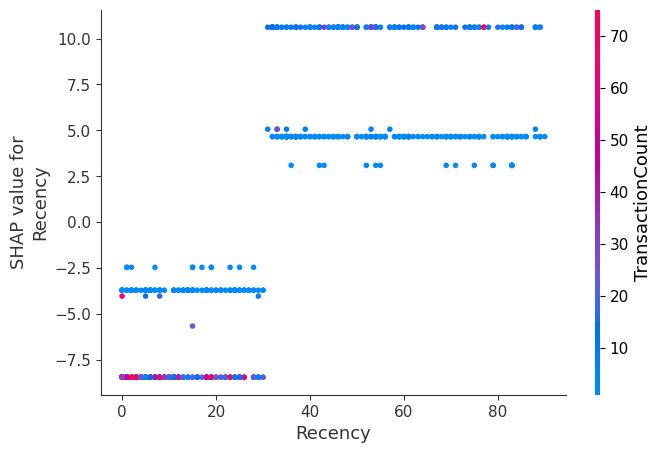

In [40]:
shap.dependence_plot('Recency', shap_values, X_test)


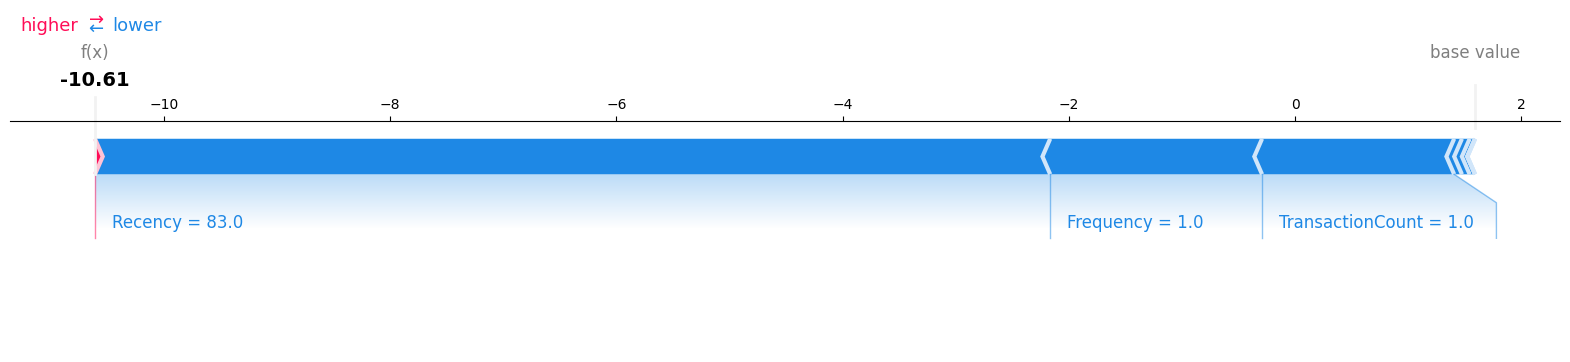

In [47]:
shap.initjs()
# Visualize a force plot for one prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:],matplotlib=True)



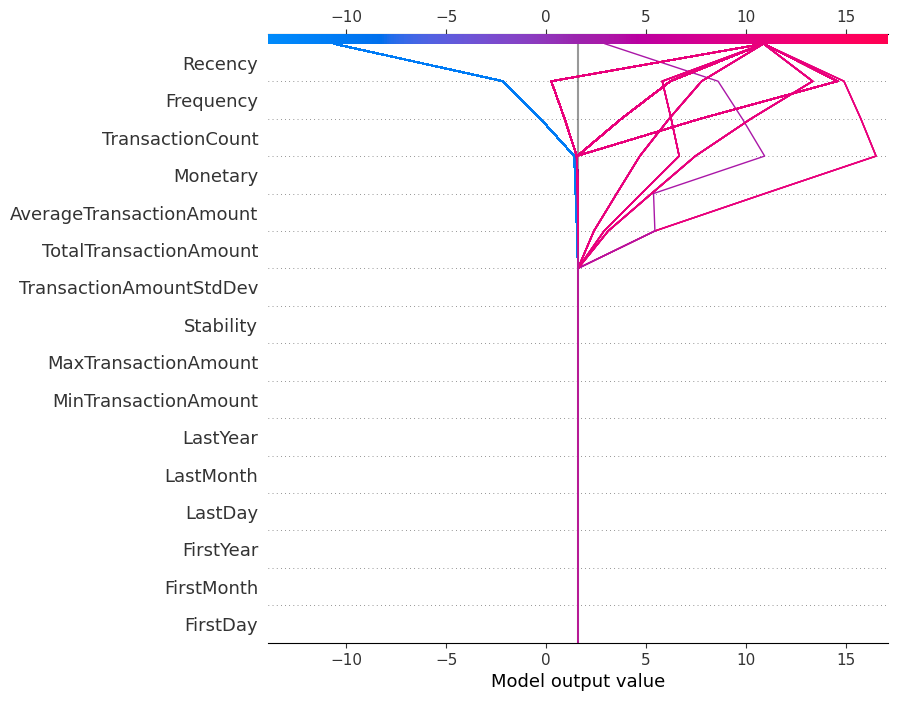

In [48]:
shap.decision_plot(explainer.expected_value, shap_values, X_test.columns)